In [1]:
import pandas as pd

import utility

train_set_path = './dataset/train_new_feature.csv'
test_set_path = './dataset/test_new_feature.csv'

train_set, test_set = utility.train_test_split_by_group(pd.read_csv(train_set_path), id_column='srch_id', test_size=0.1, random_state= 7)

In [2]:
X_train, y_train, qid_train, X_test, y_test, qid_test = utility.preprocess_data(train_set, test_set, test_label=True)

# X_train.drop(['prop_id'], axis=1, inplace=True)
# X_test.drop(['prop_id'], axis=1,  inplace=True)

X_train

,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,MEAN_price_per_prop,SUB_price_MEAN,SUB_propscore2_MEAN
0,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,...,1,0,4,0,1,1,NaN,118.758742,-13.988742,-0.005192
1,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,...,1,0,4,0,1,1,NaN,152.054082,18.685918,-0.034092
2,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,...,1,0,4,0,1,1,NaN,168.540871,11.259129,-0.024492
3,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,...,1,0,4,0,1,1,NaN,82.598870,520.171130,-0.036492
4,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,...,1,0,4,0,1,1,NaN,137.648135,5.931865,0.075108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,NaN,NaN,219,77700,3,4.0,1,1.61,0.0471,0.00,...,1,21,3,0,1,0,NaN,131.241702,-13.241702,-0.023325
4958343,NaN,NaN,219,88083,3,4.0,1,1.95,0.1520,0.00,...,1,21,3,0,1,0,NaN,84.545789,4.454211,0.081575
4958344,NaN,NaN,219,94508,3,3.5,1,1.10,0.0164,0.00,...,1,21,3,0,1,0,NaN,116.537209,-17.537209,-0.054025
4958345,NaN,NaN,219,128360,3,5.0,1,1.95,0.0662,0.00,...,1,21,3,0,1,0,NaN,150.336757,-11.336757,-0.004225


In [3]:
params = {
    "objective": "lambdarank",
    "metric": "ndcg",
    "n_estimators": 1000,
    "learning_rate": 0.2
}
model = utility.train_lgbm_ranker(X_train, y_train, qid_train.value_counts().sort_index(), params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3231
[LightGBM] [Info] Number of data points in the train set: 4461236, number of used features: 22


In [4]:
utility.calculate_ndcg(model, X_test, y_test, qid_test, k=5)

Calculating NDCG scores: 100%|██████████| 19980/19980 [00:23<00:00, 850.46it/s]


0.3835066699638144

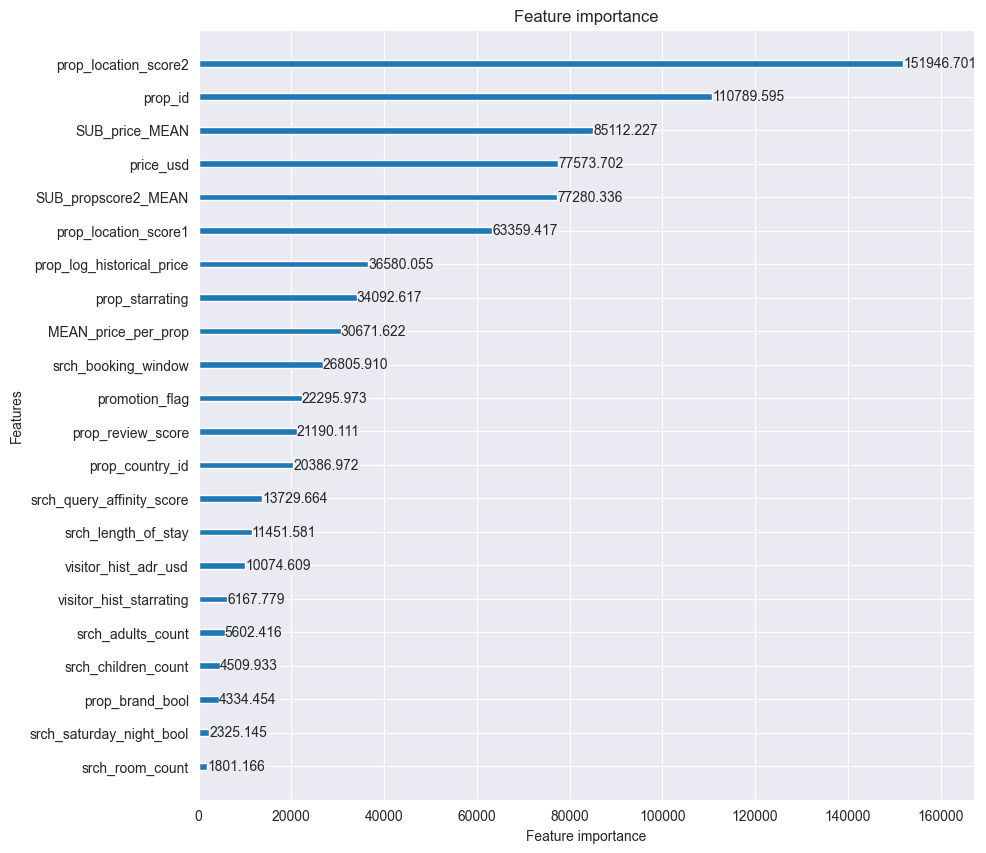

In [5]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming `model` is your trained LightGBM model
# Change tree_index to the specific tree you want to visualize
lgb.plot_importance(model, importance_type='gain', figsize=(10,10))
plt.savefig('./model1.png', dpi=1200)
